<a href="https://colab.research.google.com/github/9zxu/data-analysis/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Titanic Dataset

- [dataset link](https://www.kaggle.com/datasets/yasserh/titanic-dataset/data)

- [competition](https://www.kaggle.com/competitions/titanic/data)

- goal: binary classification, whether the person would survive

- suitable model: random forest, SVM, XGBoost, LightGBM

- baseline model: KNN, Dicision Tree, Logistic Regression


In [ ]:
import kagglehub
path = kagglehub.dataset_download("yasserh/titanic-dataset")

Using Colab cache for faster access to the 'titanic-dataset' dataset.


In [ ]:
!ls -l $path

total 60
-rw-r--r-- 1 1000 1000 61194 Jan  5 05:36 Titanic-Dataset.csv


In [ ]:
import os
files = os.listdir(path)
print("files:", files)
data_path = os.path.join(path, files[0])
data_path

files: ['Titanic-Dataset.csv']


'/kaggle/input/titanic-dataset/Titanic-Dataset.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(data_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.isnull().sum()
# df.isnull().sum() / df.shape[0]

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


# Data Inspect
data type of each column

In [ ]:
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


ununiqueness

In [ ]:
# df.nunique()
# df.notnull().sum()
df.notnull().sum() / df.nunique()

,0
PassengerId,1.000000
Survived,445.500000
Pclass,297.000000
Name,1.000000
Sex,445.500000
Age,8.113636
SibSp,127.285714
Parch,127.285714
Ticket,1.308370
Fare,3.592742


In [ ]:
df['Cabin'].value_counts()

,count
Cabin,
G6,4
C23 C25 C27,4
B96 B98,4
F2,3
D,3
...,...
E17,1
A24,1
C50,1


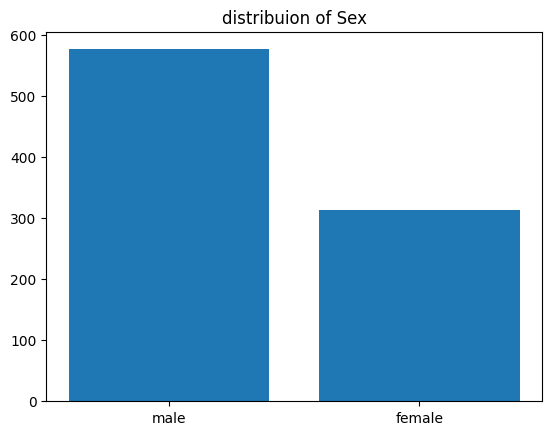

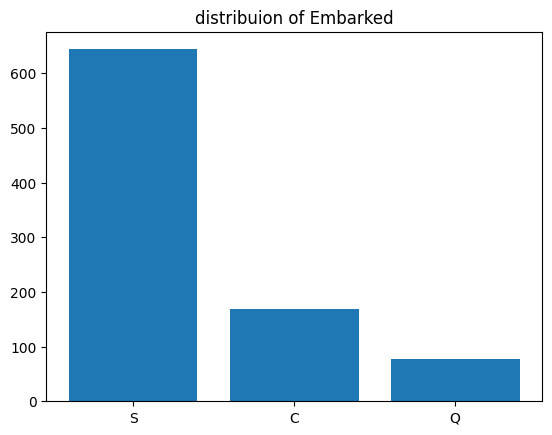

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

obj_cols = ['Sex', 'Embarked']

for col in obj_cols:
  plt.bar(df[col].value_counts().index, df[col].value_counts())
  plt.title(f"distribuion of {col}")
  plt.show()

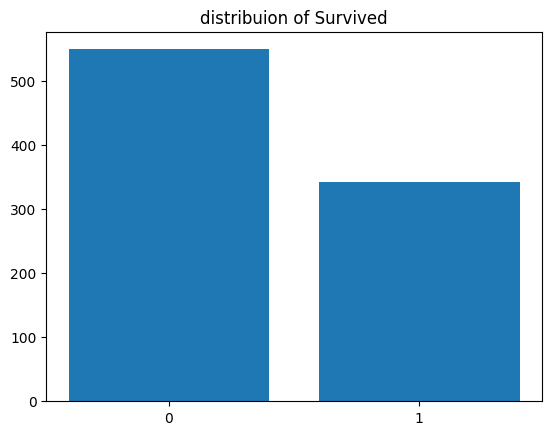

In [ ]:
plt.bar(df['Survived'].value_counts().index, df['Survived'].value_counts())
plt.xticks([0, 1])
plt.title("distribuion of Survived")
plt.show()

serial type data

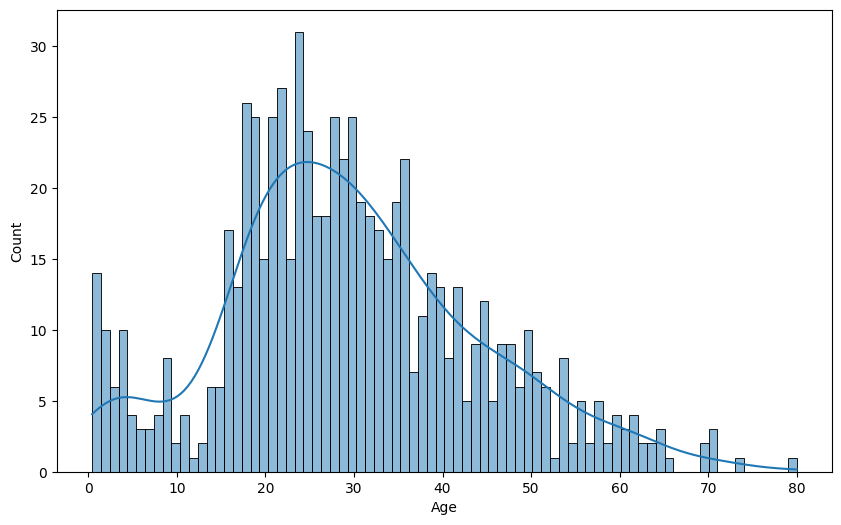

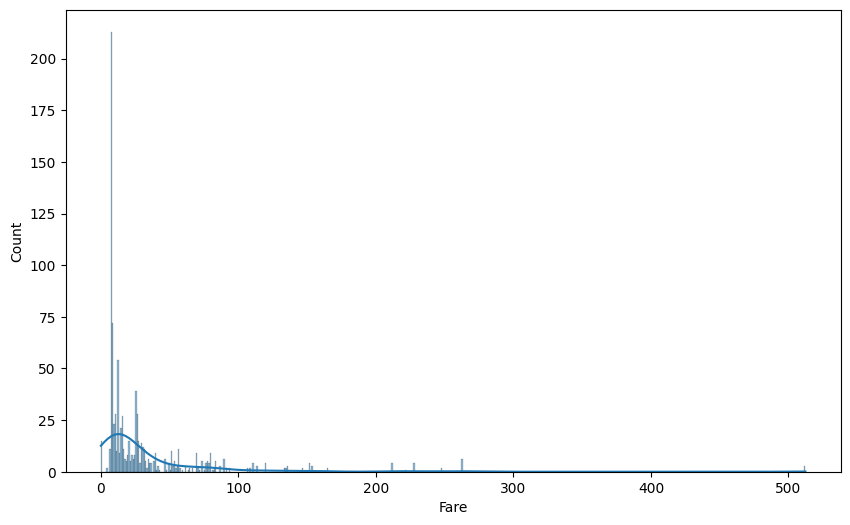

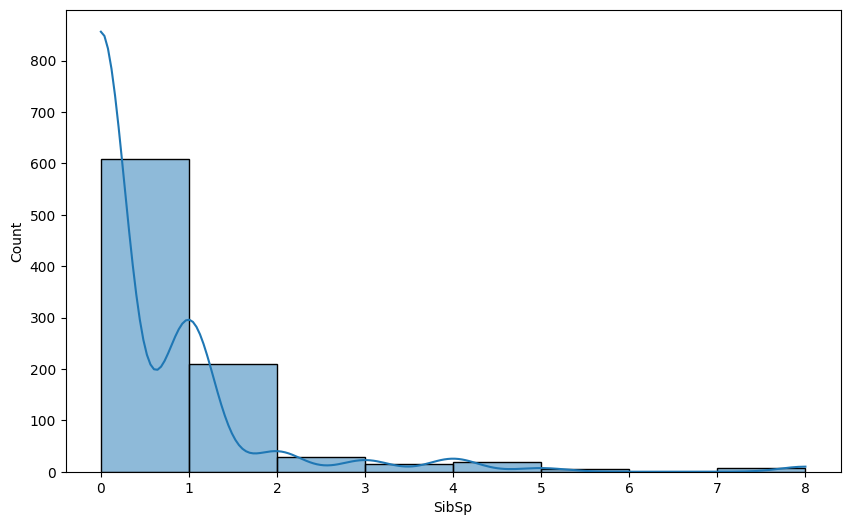

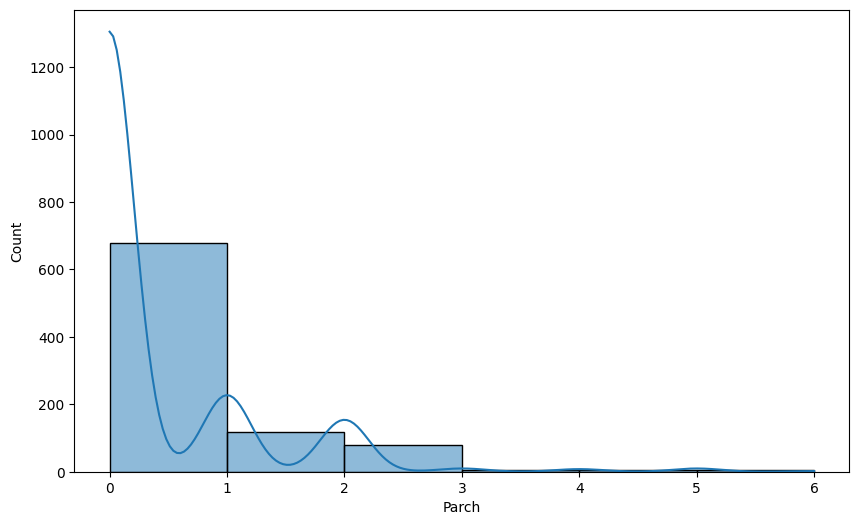

In [ ]:
serial_cols = ['Age', 'Fare', 'SibSp','Parch']
for cols in serial_cols:
  plt.figure(figsize=(10, 6)) # Optional: Adjusts the size of the plot
  sns.histplot(df[cols], binwidth=1, kde=True)
  plt.show()

# Clean up Dataset

In [ ]:
df_cleaned = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

object_cols = df_cleaned.select_dtypes(include=['object'])
for col in object_cols:
  df_cleaned[col] = le.fit_transform(df_cleaned[col])
  print(f"{col}: {le.classes_}")

Name: ['Abbing, Mr. Anthony' 'Abbott, Mr. Rossmore Edward'
 'Abbott, Mrs. Stanton (Rosa Hunt)' 'Abelson, Mr. Samuel'
 'Abelson, Mrs. Samuel (Hannah Wizosky)' 'Adahl, Mr. Mauritz Nils Martin'
 'Adams, Mr. John' 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)'
 'Aks, Mrs. Sam (Leah Rosen)' 'Albimona, Mr. Nassef Cassem'
 'Alexander, Mr. William' 'Alhomaki, Mr. Ilmari Rudolf' 'Ali, Mr. Ahmed'
 'Ali, Mr. William' 'Allen, Miss. Elisabeth Walton'
 'Allen, Mr. William Henry' 'Allison, Master. Hudson Trevor'
 'Allison, Miss. Helen Loraine'
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)'
 'Allum, Mr. Owen George'
 'Andersen-Jensen, Miss. Carla Christine Nielsine' 'Anderson, Mr. Harry'
 'Andersson, Master. Sigvard Harald Elias'
 'Andersson, Miss. Ebba Iris Alfrida' 'Andersson, Miss. Ellis Anna Maria'
 'Andersson, Miss. Erna Alexandra' 'Andersson, Miss. Ingeborg Constanzia'
 'Andersson, Miss. Sigrid Elisabeth' 'Andersson, Mr. Anders Johan'
 'Andersson, Mr. August Edvard ("Wennerstrom")'
 'Ander

fill `NA` with mean

In [ ]:
df_cleaned.fillna(df_cleaned.mean(), inplace=True)
df_cleaned.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df_cleaned.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,int64
Sex,int64
Age,float64
SibSp,int64
Parch,int64
Ticket,int64
Fare,float64


In [ ]:
df_cleaned.notnull().shape

(891, 12)

In [ ]:
df = df_cleaned

# Prepare Training Data

In [ ]:
import numpy as np
import pandas as pd

variable: `cols_to_train`

In [ ]:
feature_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[feature_cols]
y = df['Survived']

variable: `test_size`, `random_state`

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

variable: `max_iter`

# Benchmark

In [ ]:
from sklearn.metrics import confusion_matrix

def get_result(model_name, y_test, prediction):
  report = classification_report(y_test, prediction, output_dict=True)
  metrics = report['weighted avg']
  return {
        'Model': model_name,
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1-score']
    }

- precision: `True Positives / (True Positives + False Positives)`
"Of all the people the model predicted would survive, how many actually survived?"

- Recall: `True Positives / (True Positives + False Negatives)`
"Of all the people who actually survived, how many did the model correctly identify as survivors?"

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_plot(df_bench):
  sns.scatterplot(data=df_bench, x='Precision', y='Recall', hue='Model')
  plt.title("Precision vs Recall")
  plt.show()

  sns.barplot(data=df_bench, x='Model', y='F1-Score')
  plt.title("F1 Score")
  plt.xticks(rotation=90)
  plt.show()

cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

def cross_validation(model, x_train, y_train):
  kfold = KFold(n_splits=5, shuffle=True, random_state=42)
  scores = cross_val_score(model, x_train, y_train, cv=kfold)
  return scores

## different models

In [ ]:
!pip install xgboost lightgbm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(verbose=-1)
}

Training KNN...


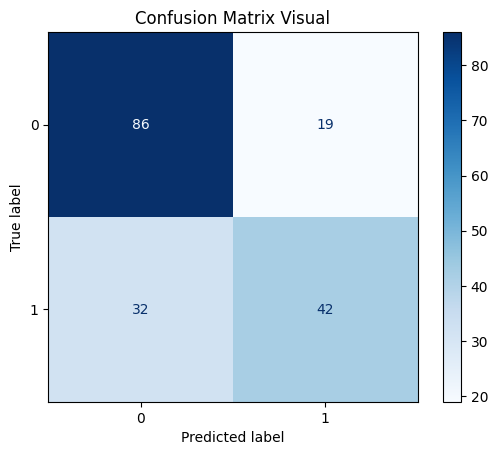

              precision    recall  f1-score   support

           0       0.73      0.82      0.77       105
           1       0.69      0.57      0.62        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.70       179
weighted avg       0.71      0.72      0.71       179

Training Decision Tree...


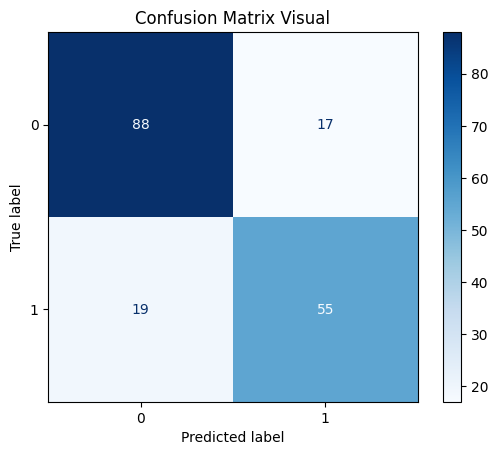

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Training Logistic Regression...


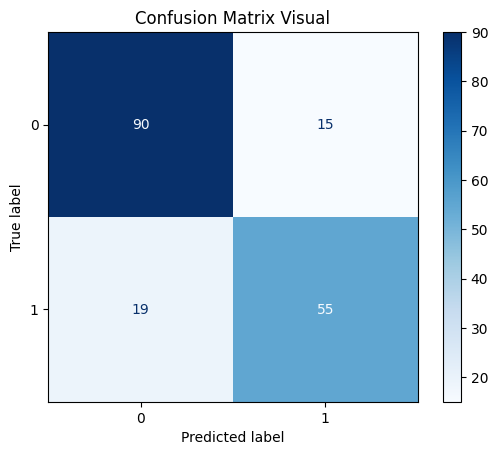

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Training Random Forest...


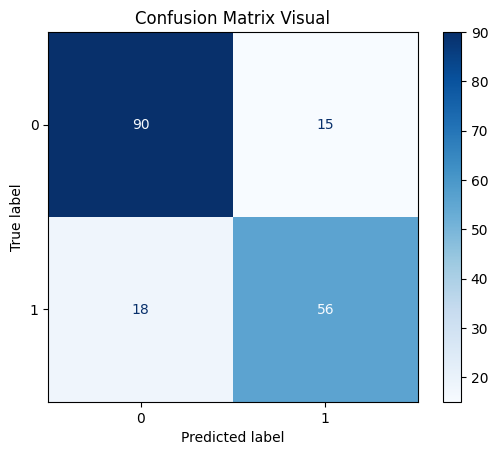

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       105
           1       0.79      0.76      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.81      0.82      0.82       179

Training SVM...


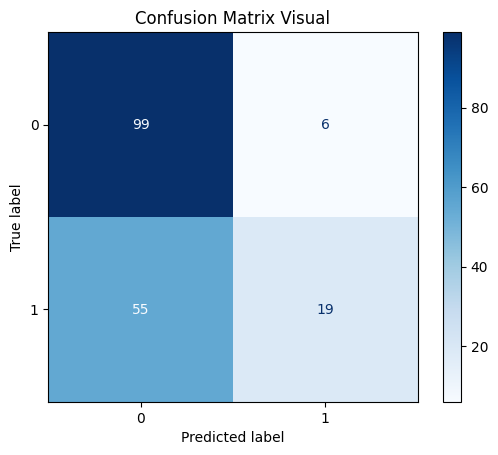

              precision    recall  f1-score   support

           0       0.64      0.94      0.76       105
           1       0.76      0.26      0.38        74

    accuracy                           0.66       179
   macro avg       0.70      0.60      0.57       179
weighted avg       0.69      0.66      0.61       179

Training XGBoost...


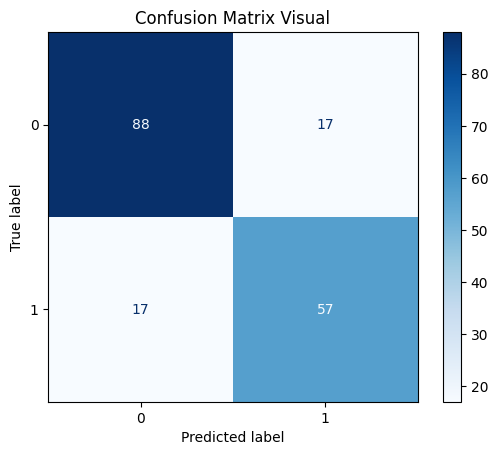

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Training LightGBM...


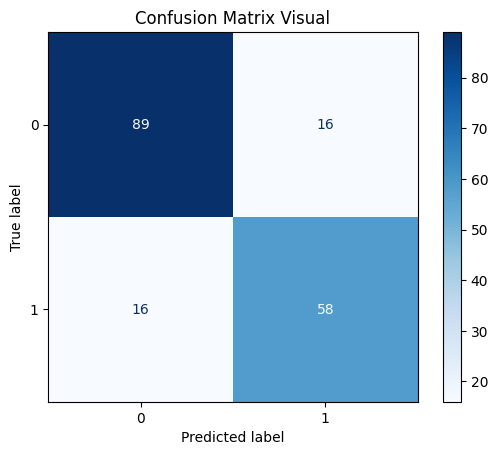

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       105
           1       0.78      0.78      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    prediction = model.predict(x_test)
    score = model.score(x_test, y_test)
    # print("accuracy:", score)

    cm = confusion_matrix(y_test, prediction)
    # print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix Visual")
    plt.show()

    print(classification_report(y_test, prediction))
    results[name] = classification_report(y_test, prediction, output_dict=True)


In [ ]:
rows = []
for model_name, report in results.items():
    # We extract the 'weighted avg' specifically for benchmarking
    metrics = report['weighted avg']
    rows.append({
        'Model': model_name,
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1-score']
    })

df_bench = pd.DataFrame(rows)
df_bench

,Model,Precision,Recall,F1-Score
0,KNN,0.712158,0.715084,0.709670
1,Decision Tree,0.798229,0.798883,0.798454
2,Logistic Regression,0.809163,0.810056,0.809193
3,Random Forest,0.814895,0.815642,0.815034
4,SVM,0.691285,0.659218,0.607119
5,XGBoost,0.810056,0.810056,0.810056
6,LightGBM,0.821229,0.821229,0.821229


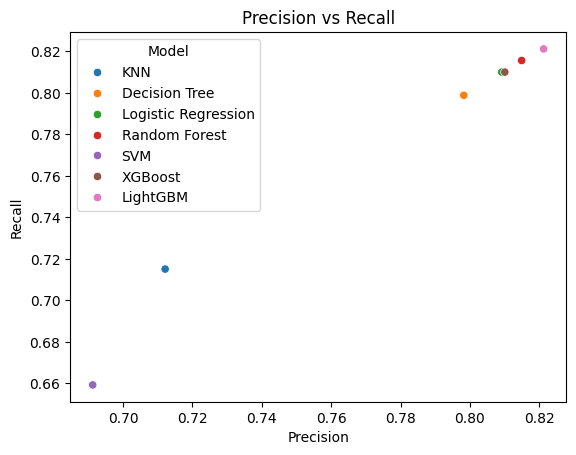

In [ ]:
sns.scatterplot(data=df_bench, x='Precision', y='Recall', hue='Model')
plt.title("Precision vs Recall")
plt.show()

- F1 score: `2 * (Precision * Recall) / (Precision + Recall)`
This is the harmonic mean of Precision and Recall. It's a single metric that tries to balance both precision and recall. A high F1-score indicates that the model has both good precision and good recall. It's particularly useful when you have an uneven class distribution (imbalanced dataset) where simply looking at accuracy might be misleading.

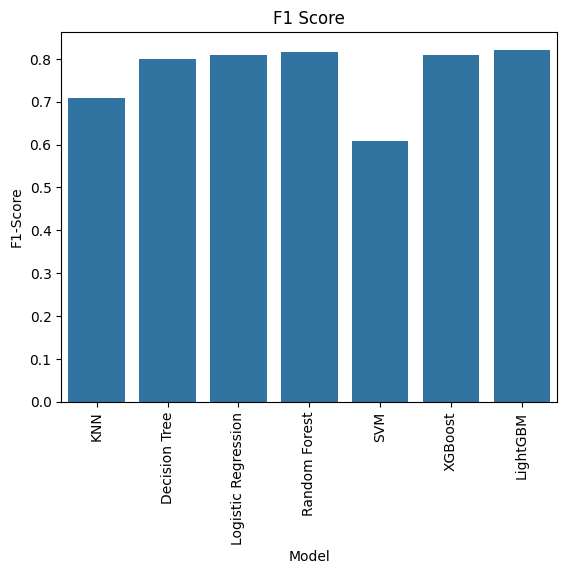

In [ ]:
sns.barplot(data=df_bench, x='Model', y='F1-Score')
plt.title("F1 Score")
plt.xticks(rotation=90)
plt.show()

## Tunning each Model

In [ ]:
!pip install xgboost lightgbm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 1. Define the Dictionary with Models and expanded Param Grids
model_configs = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "param_grid": {
            'n_neighbors': [3, 5, 7, 9, 11, 15, 21],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_grid": {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 3, 5, 7, 10, 15],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=2000, random_state=42),
        "param_grid": {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs'],
            'penalty': ['l2']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "param_grid": {
            'n_estimators': [100, 200, 500, 800, 1000],
            'max_depth': [None, 5, 10, 15],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['sqrt', 'log2']
        }
    },
    # "SVM": {
    #     "model": SVC(probability=True, random_state=42),
    #     "param_grid": {
    #         'C': [0.1, 1, 10, 100],
    #         'gamma': [1, 0.1, 0.01, 0.001, 'scale'],
    #         'kernel': ['rbf', 'poly', 'sigmoid']
    #     }
    # },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        "param_grid": {
            'n_estimators': [100, 300, 500, 1000],
            'learning_rate': [0.01, 0.05, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9],
            'subsample': [0.7, 0.8, 1.0]
        }
    },
    "LightGBM": {
        "model": LGBMClassifier(verbose=-1, random_state=42),
        "param_grid": {
            'n_estimators': [100, 300, 500, 1000],
            'learning_rate': [0.01, 0.05, 0.1],
            'num_leaves': [20, 31, 40, 60],
            'boosting_type': ['gbdt', 'dart']
        }
    }
}

# 2. The Loop to automatically run GridSearchCV
results = {}

for model_name, config in model_configs.items():
    print(f"--- Starting grid search for {model_name} ---")

    grid_search = GridSearchCV(
        estimator=config['model'],
        param_grid=config['param_grid'],
        cv=5,
        scoring='f1',
        verbose=1,
        n_jobs=-1  # Uses all processors to speed up the large grid
    )

    # Ensure x_train and y_train are defined in your environment
    grid_search.fit(x_train, y_train)

    # Store the results in a structured way
    results[model_name] = {
        "best_model": grid_search.best_estimator_,
        "best_params": grid_search.best_params_,
        "best_score": grid_search.best_score_
    }

    print(f"Best Score for {model_name}: {grid_search.best_score_:.4f}")
    print(f"Best Params: {grid_search.best_params_}\n")

In [ ]:
import pandas as pd
summary_list = []
for name, res in results.items():
    summary_list.append({"Model": name, "F1_Score": res['best_score'], "Params": res['best_params']})

summary_df = pd.DataFrame(summary_list).sort_values(by="F1_Score", ascending=False)
print(summary_df)

```
--- Starting grid search for KNN ---
Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best Score for KNN: 0.6393
Best Params: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}

--- Starting grid search for Decision Tree ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Score for Decision Tree: 0.7505
Best Params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

--- Starting grid search for Logistic Regression ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Score for Logistic Regression: 0.7155
Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}

--- Starting grid search for Random Forest ---
Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Score for Random Forest: 0.7489
Best Params: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}

--- Starting grid search for XGBoost ---
Fitting 5 folds for each of 192 candidates, totalling 960 fits
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:08:55] WARNING: /workspace/src/learner.cc:790:
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
Best Score for XGBoost: 0.7654
Best Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.7}

--- Starting grid search for LightGBM ---
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Score for LightGBM: 0.7591
Best Params: {'boosting_type': 'gbdt', 'learning_rate': 0.05, 'n_estimators': 100, 'num_leaves': 31}
```

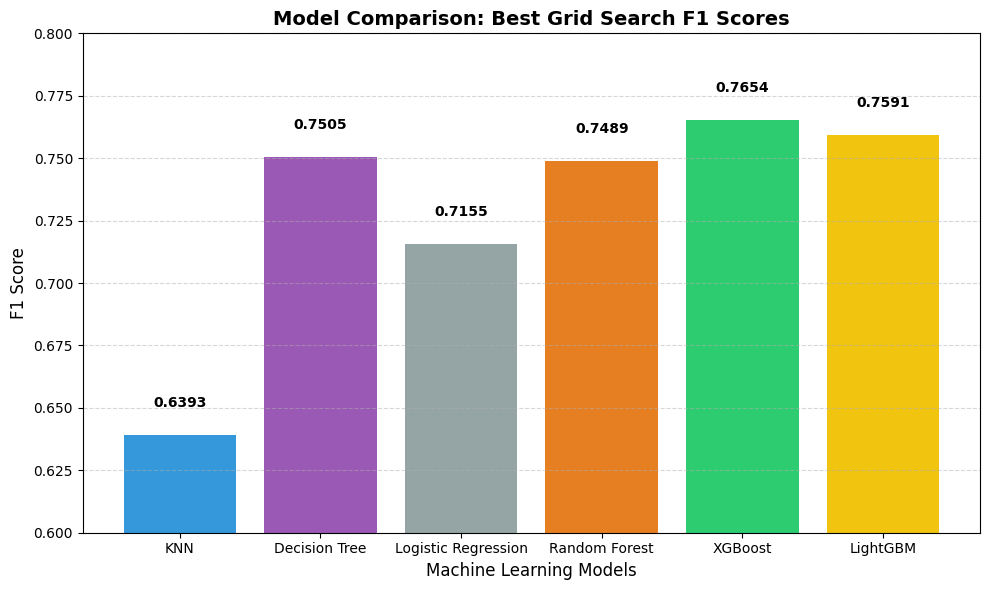

In [ ]:
import matplotlib.pyplot as plt

# Data from your results
models = ['KNN', 'Decision Tree', 'Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']
scores = [0.6393, 0.7505, 0.7155, 0.7489, 0.7654, 0.7591]

# Set up the figure
plt.figure(figsize=(10, 6))
colors = ['#3498db', '#9b59b6', '#95a5a6', '#e67e22', '#2ecc71', '#f1c40f']

bars = plt.bar(models, scores, color=colors)

plt.title('Model Comparison: Best Grid Search F1 Scores', fontsize=14, fontweight='bold')
plt.xlabel('Machine Learning Models', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)
plt.ylim(0.6, 0.8)

# Add the specific values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontweight='bold')

# Add a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Display the plot
plt.tight_layout()
plt.show()
